

# Project: Analysis of Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
I will analyze this data set and answer four questions:
<ul>
<li>Top 10 directors has directed the most films?</li>
<li>What is the relationship between vote counts and popularity?</li>
<li>What time of year are most movies released?</li>
<li>Which genres are most popular in the top 50 most popular movies?</li>
<li>What characteristics do the top 50 most popular movies share?</li>
<ul>

In [150]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [151]:
# Load data to investigate first few lines
df = pd.read_csv('tmdb-movies.csv', index_col=None)
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  

[3 rows x 21 columns]

In [152]:
# Check general info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [153]:
# Check Null values in dataframe
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [154]:
# Check duplicates in the dataframe
df.duplicated().sum()

1

Steps I need to do to organize data:
<ul>
<li>Drop unnecessary columns: id, imdb_id, budget, revenue, cast, homepage, tagline, keywords, overview, production_companies, budget_adj</li>
<li>Missing values with are not really significant when unnecessary columns are dropped, so I decide not to replace them</li>
<li>Drop duplicated rows</li>
<ul>


### Data Cleaning

In [155]:
# Drop unnecessary columns: id, imdb_id, budget, revenue, cast, homepage, tagline, keywords, overview
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 849.0+ KB


In [156]:
# Check Null values in dataframe again
df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
revenue_adj        0
dtype: int64

In [157]:
# Drop duplicated rows
df.drop_duplicates(inplace=True) #Drop duplicates 

In [158]:
# Check duplicates in the dataframe again
df.duplicated().sum()

0

In [159]:
# Check the number of rows with equal to zero in revenue_adj column
df.query('revenue_adj == 0').shape[0]

6016

In [160]:
df.query('revenue_adj == 0').shape[0]/df.shape[0]

0.5537045559134837

> There are more than half of the data with zero revenue. For now, I decided to investigate the ones with revenue not equal to zero.

In [161]:
# Drop zero value rows in revenue_adj column
df.drop(df.query('revenue_adj == 0').index, inplace=True)

In [162]:
# Check again to make sure they are dropped
df.query('revenue_adj == 0')['revenue_adj'].count()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Who are the top 10 directors with the most films?

In [163]:
df.director.value_counts(dropna=True).head(10)

Steven Spielberg     27
Clint Eastwood       26
Woody Allen          22
Ridley Scott         22
Martin Scorsese      18
Ron Howard           18
Steven Soderbergh    17
Joel Schumacher      16
Tony Scott           16
Tim Burton           16
Name: director, dtype: int64

In [164]:
# We have top 10 results but we need to check if film counts 16 (Tim Burton) has duplicates.
df['director'].value_counts()[df['director'].value_counts()==16]

Joel Schumacher    16
Tony Scott         16
Tim Burton         16
Name: director, dtype: int64

In [165]:
# The names of top ten directors with most films
temp = df[df['director'].isin(df['director'].value_counts()[df['director'].value_counts()>=16].index)]
temp.director.unique().tolist()

['Ridley Scott',
 'Steven Spielberg',
 'Ron Howard',
 'Woody Allen',
 'Clint Eastwood',
 'Tim Burton',
 'Tony Scott',
 'Steven Soderbergh',
 'Martin Scorsese',
 'Joel Schumacher']

> We can see that Tim Burton, Wes Craven and Barry Levinson have produced 16 films. So we have top 10 directors (with ties) with most films.

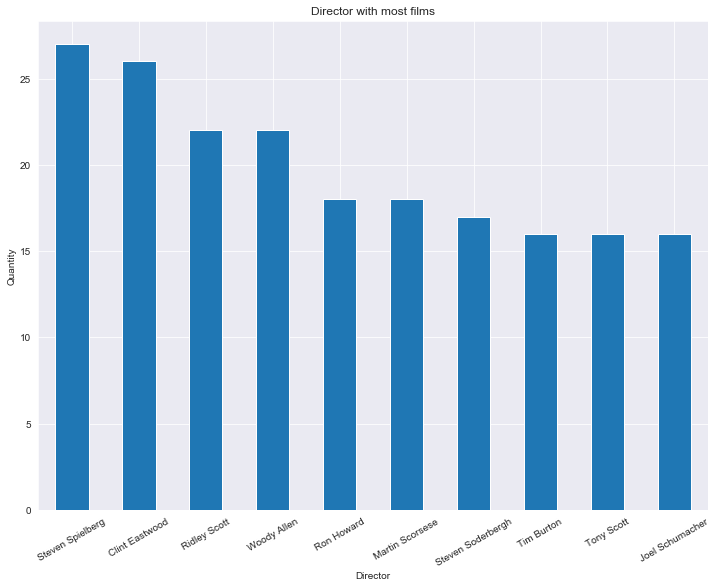

In [166]:
# Plot histogram
plt.figure(figsize=(12, 9))
df['director'].value_counts()[df['director'].value_counts()>=16].sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Director with most films')
plt.xlabel('Director')
plt.ylabel('Quantity');

> I choose a bar chart because I want to show a distribution of one-dimensional data points of top directors with most movies.

> #### Clint Eastwood, Steven Spielberg, and those among the top 10 list have contributed a lot to the film industry by producing quite several movies. I am impressed with their dedication.

### Research Question 2: What is the relationship between vote_average and popularity?

> To see the relationship between two variables, I choose a scatter plot.

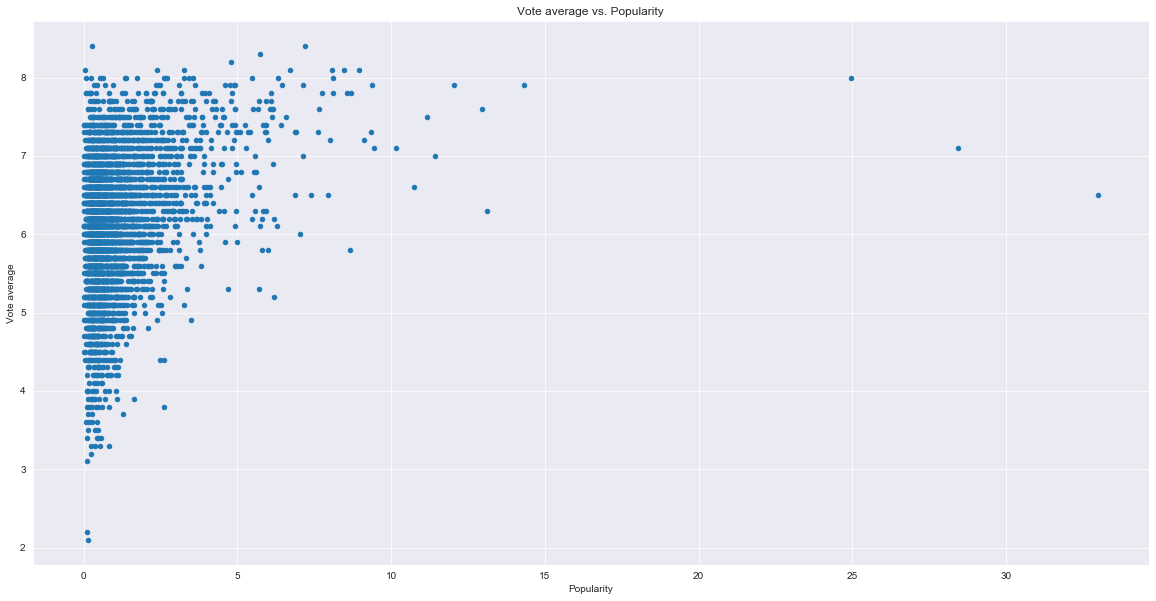

In [167]:
# Plot graphs
df.plot(y='vote_average', x='popularity', kind='scatter', figsize=(20,10))
plt.title('Vote average vs. Popularity')
plt.xlabel('Popularity')
plt.ylabel('Vote average');

> On average, we see that popular movies (range 5-35) fall into the 6-8 range of vote average.

> #### Most popular movies received ratings between 6-8 (out of 10), and I think it is a reasonable metric. Generally, popular movies are good(worth to watch) movies.

### Research Question 3: What time of year are most movies released?

> I want to know what time of the year has most movie released on average.

In [168]:
# First we need to convert datatype from string to datatime, then use function dt.quarter to get value counts 
# of each quarter
movies_quarterly = df['release_date'].astype('datetime64[ns]').dt.quarter.value_counts()
movies_quarterly

3    1424
4    1304
2    1125
1     996
Name: release_date, dtype: int64

In [169]:
# Sort index from low to high in order to plot histogram
movies_quarterly.sort_index(inplace=True)

> I choose bar graph again to plot one-dimensional data

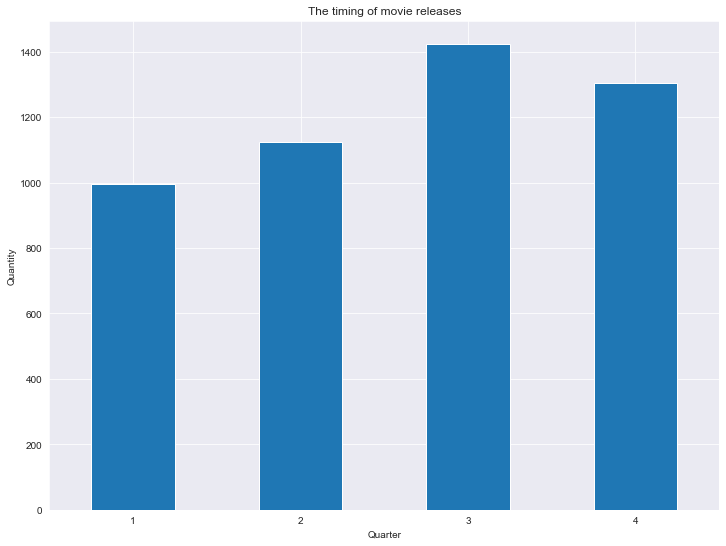

In [170]:
# Plot graph
plt.figure(figsize=(12, 9))
movies_quarterly.plot(kind='bar')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('The timing of movie releases')
plt.xlabel('Quarter')
plt.ylabel('Quantity');

> We see that the most popular time to release movies is in summer (July, August, September). The second popular choice is the fourth quarter (October, November, December).

> #### We can see that most movies are released during summer time and holiday seasons. During third and last quarter of the year, movies have more chances to be watched by audiences.

### Research Question 4: Which genres are most popular in the top 50 most popular movies?

> I want to know the genres of the top 50 most popular movies.

In [171]:
# First, I get the top 30 most popular movies based on popularity column
popular_movies = df.sort_values(by=['popularity'], ascending=False).head(50)
popular_movies.head(5)

popularity           original_title           director  runtime  \
0     32.985763           Jurassic World    Colin Trevorrow      124   
1     28.419936       Mad Max: Fury Road      George Miller      120   
629   24.949134             Interstellar  Christopher Nolan      169   
630   14.311205  Guardians of the Galaxy         James Gunn      121   
2     13.112507                Insurgent   Robert Schwentke      119   

                                        genres release_date  vote_count  \
0    Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1    Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
629            Adventure|Drama|Science Fiction      11/5/14        6498   
630           Action|Science Fiction|Adventure      7/30/14        5612   
2           Adventure|Science Fiction|Thriller      3/18/15        2480   

     vote_average  release_year   revenue_adj  
0             6.5          2015  1.392446e+09  
1             7.1          2015  3.481613e+08  
629           8.0          2014  5.726906e+08  
630           7.9          2014  7.122911e+08  
2             6.3          2015  2.716190e+08

In [172]:
# Then split the genres column by the "|" and add the results to temporary list
a_list = popular_movies.genres.str.split('|').sum()

# Next I use Counter function to find the occurence of genre values in a_list
import collections
occurrences = collections.Counter(a_list)
occurrences

Counter({'Action': 30,
         'Adventure': 29,
         'Science Fiction': 21,
         'Thriller': 18,
         'Drama': 14,
         'Fantasy': 12,
         'Mystery': 3,
         'Crime': 7,
         'Western': 1,
         'Family': 7,
         'Animation': 4,
         'Comedy': 7,
         'History': 1,
         'War': 3,
         'Horror': 1,
         'Romance': 1})

> I want to use a pie chart to display the distribution of a single categorical variable which are movie genres.

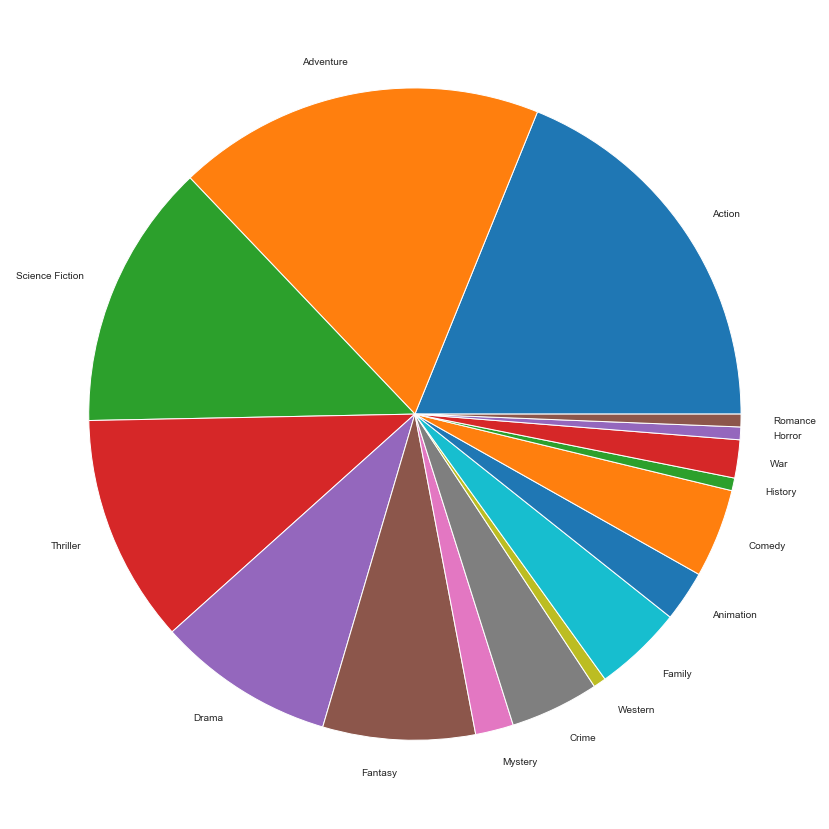

In [173]:
# Creating plot 
fig = plt.figure(figsize =(20, 15)) 
plt.pie(occurrences.values(), labels = occurrences.keys()) 
  
# show plot 
plt.show() 

> #### The genres that we generally love the most are adventure, action, sci-fi and thriller. We can easily see that most popular movies are fall into these categories.

### Research Question 5: What characteristics do the top 50 most popular movies share?

> I want to understand the relationship of revenues, released months of those blockbuster movies. I choose a scatter plot to graph the relationship.

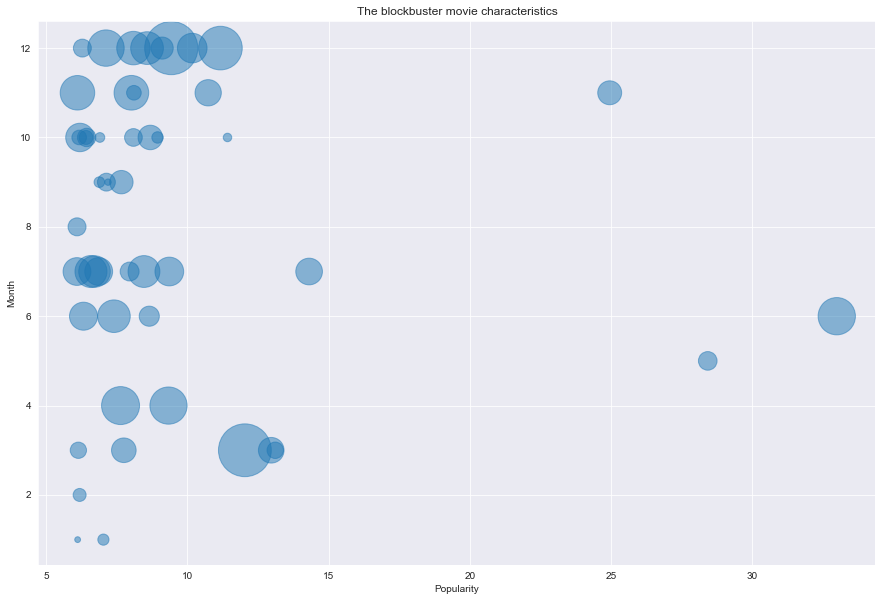

In [174]:
# Creating plot 
plt.figure(figsize =(15, 10)) 
# I choose revenue to represent the size of the scattered dot.
plt.scatter(x=popular_movies['popularity'], y=popular_movies['release_date'].astype('datetime64[ns]').dt.month, s=popular_movies['revenue_adj']/1000000, alpha=0.5)
plt.title('The blockbuster movie characteristics')
plt.xlabel('Popularity')
plt.ylabel('Month');

> #### As we can see, top blockbuster movies with huge revenues fall mostly into December and July. There are some highest-grossing ones in March/April.

<a id='conclusions'></a>
## Conclusions



### Limitations:

There are some limitations in the data set:
<br>
1. [revenue_adj] is one of the columns I use in my analysis, but more than half of it(55%) contains zero. I decided to drop the rows with zero values, and it might somewhat skew the results of the analysis. I think this one is critical and needs to be fixed.
<br>
I also think the [production_companies] column is important, and it has more than 10% empty cells. If our analysis using these columns, I think it also needs to be addressed. [homepage], [tagline], and [keywords] are missing lots of data but I think they are not as essential as [revenue_adj] and [production_companies].
<br>
2. This data set contains only movies from 1960 to 2015. I would like to have the data up to date at least till 2019 because nowadays, the movie industry produces lots of movies in one calendar year.
<br>

### Insights:

Based on the movies data set analysis we can see several things such as:
<br>
* Top directors
<br>
* The relationship between vote counts and popularity
<br>
* Best months to release new movies
<br>
* Top movie genres
<br>

It provides us some general information about the movie data set. We also can understand what characteristics do blockbuster movies share. We can analyze historical data to see the trends and potentially have some interesting insights about the date set though out analysis.